In [1]:
import numpy as np # numerical computations
import matplotlib.pyplot as plt # plotting
import pandas as pd # for working with data sets
import os
from scipy.stats import gaussian_kde, ttest_ind, t

import pathlib
pathlib.Path().resolve()

# plot within notebook, useful for later sharing
%matplotlib inline

In [15]:
os.chdir('c:\\Users\\nikib\\Downloads\\bn research project\\BN repository\\BN-research-project\\data') # change the string here to match the path from your computer

In [16]:
data = pd.read_csv("clean_explorations.csv", sep=",", header = 0)
data

,Video Name,Sex,Sleep,Cycle,Index
0,NOL_A1R_TEST_070324 (1),Female,SD,proestrus,0.632089
1,Nol A1rl Test 070324,Female,SD,proestrus,0.761194
2,Nol A20 Test 110324,Female,NSD,proestrus,0.455128
3,Nol A2l Test 090324,Female,NSD,proestrus,0.400000
4,Nol B1l Test 090324,Female,SD,proestrus,0.446226
5,Nol B1rl Test 090324,Female,SD,estrus,0.838551
6,Nol B20 Test 090324,Female,SD,proestrus,0.541371
7,Nol B2r Test 090324,Female,SD,estrus,0.614679
8,Nol C1l Test 270324,Female,SD,proestrus,0.563994
9,Nol C1rl Test 270324,Female,SD,proestrus,0.583032


In [17]:
data.columns # view the column names of the data frame

Index(['Video Name', 'Sex', 'Sleep', 'Cycle', 'Index'], dtype='object')

In [18]:
# Define SE function
def standard_error(x):
    return x.std() / np.sqrt(len(x))

In [19]:
# Perform all aggregations in ONE step
aggregated_measures = data.groupby(['Sex', 'Sleep']).agg(
    mean=('Index', 'mean'),
    sd=('Index', lambda x: x.std(ddof=1) if len(x) > 1 else np.nan),
    se=('Index', lambda x: standard_error(x) if len(x) > 1 else np.nan),
    median=('Index', 'median'),
    q1=('Index', lambda x: x.quantile(0.25)),
    q3=('Index', lambda x: x.quantile(0.75)),
    iqr=('Index', lambda x: x.quantile(0.75) - x.quantile(0.25)),
).reset_index()

data

,Video Name,Sex,Sleep,Cycle,Index
0,NOL_A1R_TEST_070324 (1),Female,SD,proestrus,0.632089
1,Nol A1rl Test 070324,Female,SD,proestrus,0.761194
2,Nol A20 Test 110324,Female,NSD,proestrus,0.455128
3,Nol A2l Test 090324,Female,NSD,proestrus,0.400000
4,Nol B1l Test 090324,Female,SD,proestrus,0.446226
5,Nol B1rl Test 090324,Female,SD,estrus,0.838551
6,Nol B20 Test 090324,Female,SD,proestrus,0.541371
7,Nol B2r Test 090324,Female,SD,estrus,0.614679
8,Nol C1l Test 270324,Female,SD,proestrus,0.563994
9,Nol C1rl Test 270324,Female,SD,proestrus,0.583032


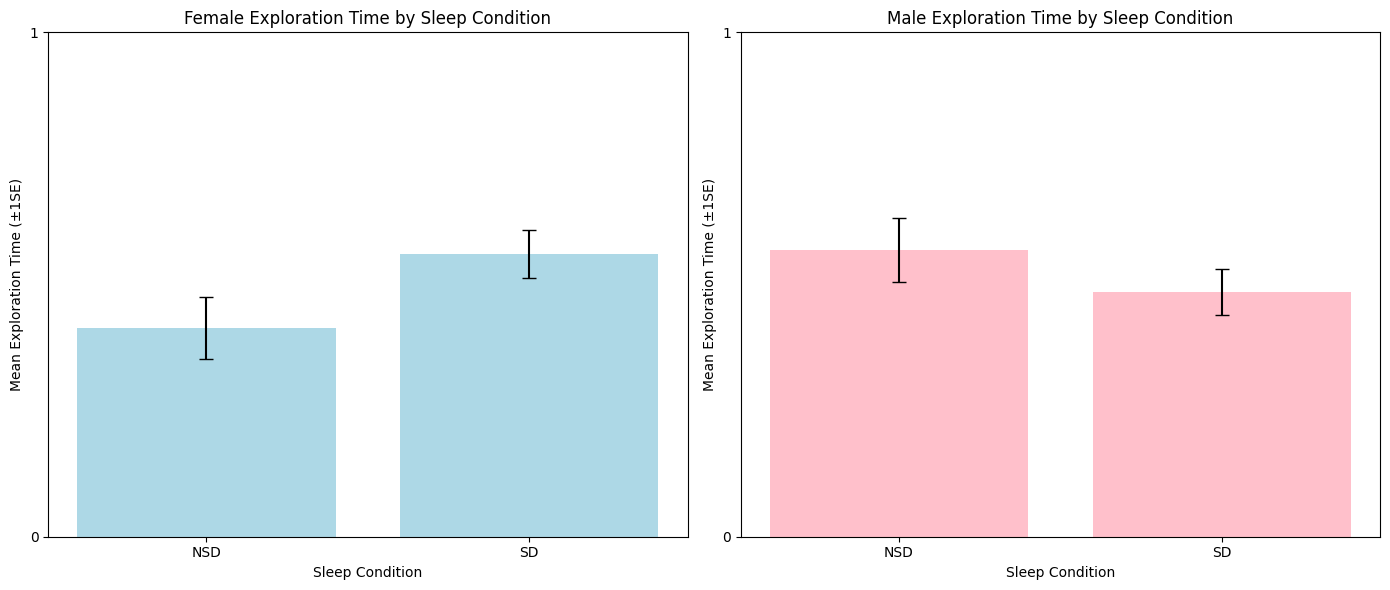

In [20]:
from matplotlib.ticker import MaxNLocator

# Assuming `data` already contains the necessary data

# Create a figure with two subplots (one for Male and one for Female)
fig, (ax_female, ax_male) = plt.subplots(1, 2, figsize=(14, 6))

# Female Data
female_data = aggregated_measures[aggregated_measures['Sex'] == 'Female']
x_female = np.arange(len(female_data))  # X-axis positions for Female

# Plot bars for Female
ax_female.bar(
    x_female,
    female_data['mean'],
    color='lightblue',
    yerr=female_data['se'],
    capsize=5
)

# Set labels and title for Female plot
ax_female.set_xticks(x_female)
ax_female.set_xticklabels(female_data['Sleep'])
ax_female.set_ylim(0, 1)  # Adjust y-axis limit as needed
ax_female.set_xlabel("Sleep Condition")
ax_female.set_ylabel("Mean Exploration Time (±1SE)")
ax_female.set_title("Female Exploration Time by Sleep Condition")
ax_female.yaxis.set_major_locator(MaxNLocator(integer=True))

# Male Data
male_data = aggregated_measures[aggregated_measures['Sex'] == 'Male']
x_male = np.arange(len(male_data))  # X-axis positions for Male

# Plot bars for Male
ax_male.bar(
    x_male,
    male_data['mean'],
    color='pink',
    yerr=male_data['se'],
    capsize=5
)

# Set labels and title for Male plot
ax_male.set_xticks(x_male)
ax_male.set_xticklabels(male_data['Sleep'])
ax_male.set_ylim(0, 1)  # Adjust y-axis limit as needed
ax_male.set_xlabel("Sleep Condition")
ax_male.set_ylabel("Mean Exploration Time (±1SE)")
ax_male.set_title("Male Exploration Time by Sleep Condition")
ax_male.yaxis.set_major_locator(MaxNLocator(integer=True))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import ttest_1samp
def perform_t_test(sample1, sample2, equal_var = False, alternative="two-sided", paired = False, one_sample = False):
    n1, n2 = len(sample1), len(sample2)

    # T-test
    if paired:
        t_stat, p_value = ttest_rel(sample1, sample2, alternative=alternative)
        df = n1 - 1
    else:
        if not one_sample:
            t_stat, p_value = ttest_ind(sample1, sample2, equal_var=equal_var,
                                        alternative=alternative)
            df = n1 + n2 - 2


    # Print results
    print(f"t = {t_stat:.3f}, df = {df}, p-value = {p_value:.3f}")
    print("\n")
def perform_one_sample_t_test(sample, population_mean=0.5):
    # Drop NaN values
    sample = sample.dropna()

    # Ensure we have at least 2 data points
    if len(sample) < 2:
        print(f"Not enough data points (n={len(sample)}) to perform t-test.")
        return

    # Perform the one-sample t-test
    t_stat, p_value = ttest_1samp(sample, population_mean)

    # Degrees of freedom
    df = len(sample) - 1

    # Print results
    print(f"t = {t_stat:.3f}, df = {df}, p-value = {p_value:.3f}\n")

In [9]:

# Step 1: Filter the aggregated data for Female SD
female_SD = data[(data['Sex'] == 'Female') & (data['Sleep'] == 'SD')]
female_NSD = data[(data['Sex'] == 'Female') & (data['Sleep'] == 'NSD')]
male_SD = data[(data['Sex'] == 'Male') & (data['Sleep'] == 'SD')]
male_NSD = data[(data['Sex'] == 'Male') & (data['Sleep'] == 'NSD')]

In [10]:
# 1. Two-tailed t-test (Welch's t-test)
print("1. FEMALE SD Two-Tailed Independent T-Test (Welch's t-test)")
perform_one_sample_t_test(female_SD['Index'], 0.5)
print("2. FEMALE Non-SD Two-Tailed Independent T-Test (Welch's t-test)")
perform_one_sample_t_test(female_NSD['Index'], 0.5)
print("3. MALE SD Two-Tailed Independent T-Test (Welch's t-test)")
perform_one_sample_t_test(male_SD['Index'], 0.5)
print("4. MALE Non-SD Two-Tailed Independent T-Test (Welch's t-test)")
perform_one_sample_t_test(male_NSD['Index'], 0.5)

1. FEMALE SD Two-Tailed Independent T-Test (Welch's t-test)
t = 1.290, df = 11, p-value = 0.223

2. FEMALE Non-SD Two-Tailed Independent T-Test (Welch's t-test)
t = -1.412, df = 10, p-value = 0.188

3. MALE SD Two-Tailed Independent T-Test (Welch's t-test)
t = -0.329, df = 10, p-value = 0.749

4. MALE Non-SD Two-Tailed Independent T-Test (Welch's t-test)
t = 1.086, df = 10, p-value = 0.303



In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming your data is in a DataFrame called 'data'
# Perform 2-way ANOVA
formula = 'Index ~ C(Sex) + C(Sleep) + C(Sex):C(Sleep)'  # Interaction term included
model = ols(formula, data=data).fit()

# ANOVA table
anova_table = anova_lm(model, typ=2)

print(anova_table)

                   sum_sq    df         F    PR(>F)
C(Sex)           0.015666   1.0  0.465971  0.498685
C(Sleep)         0.013178   1.0  0.391969  0.534736
C(Sex):C(Sleep)  0.150578   1.0  4.478725  0.040436
Residual         1.378448  41.0       NaN       NaN
